In [1]:
import pandas as pd
import json
import pprint as pp
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np

In [2]:
from pathlib import Path
filepath = Path('Resources/V2/Cleanned_Geojson.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 

In [3]:
# Reading csv file
converted_df = pd.read_csv(filepath)

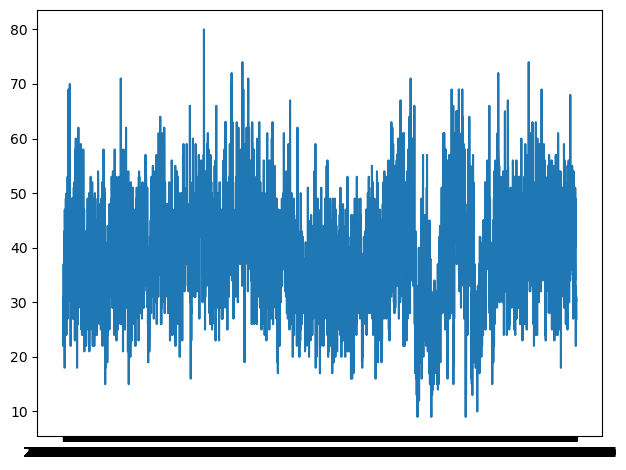

In [4]:
# Grouping by year
year_df1 = converted_df.groupby(pd.Grouper(key="ACCIDENT_DATE")).count()["ACCIDENT_NO"]

# Plot a time series linear graph 
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.plot_date(year_df1.index,year_df1,ydate=False,xdate=True)  # Plot some data on the Axes.
ax.plot(year_df1)
fig.tight_layout()
plt.show()

In [5]:
converted_df["ACCIDENT_DATE"] =converted_df['ACCIDENT_DATE'].astype('datetime64[ns]')

year_df = converted_df.groupby(converted_df.ACCIDENT_DATE.dt.year).count()["ACCIDENT_NO"]

year_df.head(1)

ACCIDENT_DATE
2012    13881
Name: ACCIDENT_NO, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


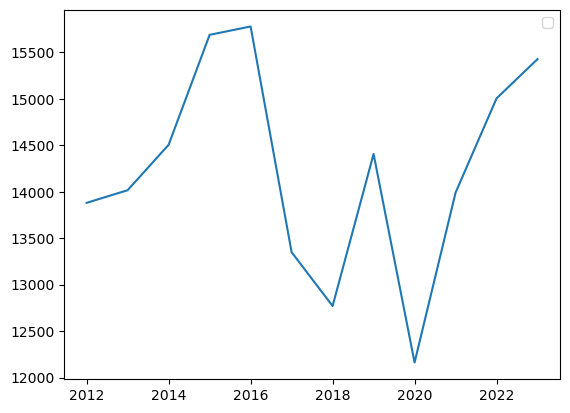

In [6]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot(year_df)  # Plot some data on the Axes.
plt.legend()
plt.show()

In [7]:
# Get the values of count of each year and month into a list
year_month_count = converted_df.groupby([converted_df.ACCIDENT_DATE.dt.year,converted_df.ACCIDENT_DATE.dt.month]).count()["ACCIDENT_NO"].values.tolist()

# Create a list from 2012 - 2022 for each month
year_month = list(range(1,145))

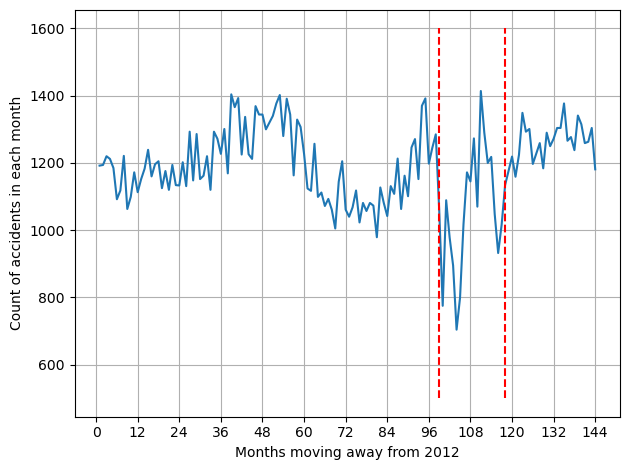

In [8]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.

# Plot x and y values
ax.plot(year_month, year_month_count) 

# Set up x axis ticks for every 12 months
plt.xticks(list(range(0,145,12)))
# Set up grid for figure
plt.grid()

plt.xlabel("Months moving away from 2012")
plt.ylabel("Count of accidents in each month")

ax.vlines(99, ymin=500, ymax=1600, label="Start of Lockdown", colors = 'r', linestyle= '--', )

ax.vlines(118, ymin=500, ymax=1600, label="End of Lockdown", colors = 'r', linestyle= '--', )


fig.tight_layout()

plt.show()

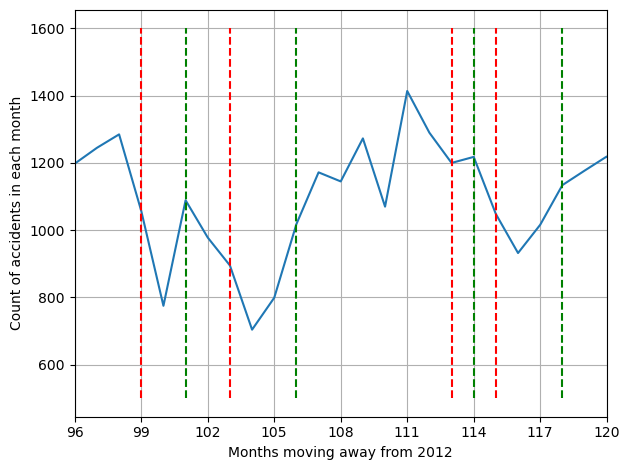

In [9]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.

# Plot x and y values
ax.plot(year_month, year_month_count) 

# Set up x axis ticks for every 12 months
plt.xticks(list(range(0,145,3)))
# Set up grid for figure
plt.grid()

plt.xlabel("Months moving away from 2012")
plt.ylabel("Count of accidents in each month")

ax.vlines(99, ymin=500, ymax=1600, label="1st Lockdown", colors = 'r', linestyle= '--', )
ax.vlines(101, ymin=500, ymax=1600, label="1st Lockdown", colors = 'g', linestyle= '--', )

ax.vlines(103, ymin=500, ymax=1600, label="2nd Lockdown", colors = 'r', linestyle= '--', )
ax.vlines(106, ymin=500, ymax=1600, label="2nd Lockdown", colors = 'g', linestyle= '--', )

ax.vlines(113, ymin=500, ymax=1600, label="3rd Lockdown", colors = 'r', linestyle= '--', )
ax.vlines(114, ymin=500, ymax=1600, label="3rd Lockdown", colors = 'g', linestyle= '--', )

ax.vlines(115, ymin=500, ymax=1600, label="4th Lockdown", colors = 'r', linestyle= '--', )
ax.vlines(118, ymin=500, ymax=1600, label="4th Lockdown", colors = 'g', linestyle= '--', )

ax.set_xlim(left=96,right=120)

fig.tight_layout()

plt.show()